La régression linéaire est une méthode statistique utilisée pour modéliser une relation linéaire entre une variable à expliquer $y$ et une ou plusieurs variables explicatives $x$.

# Régression linéaire simple (une seule variable explicative)

Nous cherchons à approcher la relation entre $x$ et $y$ par une droite:
$$y = \beta_0 + \beta_1\cdot{}x + \varepsilon$$

- $\beta_0:\, \text{intercept (ordonnée à l'origine)}$
- $\beta_1$: pente de la droite (effet de $x$ sur $y$)
- $\varepsilon$: terme d'erreur aléatoire (résidu)

L'objectif est d'estimer $\beta_0$ et $\beta_1$ à partir des données.

# Régression linéaire multiple (plusieurs variables explicatives)

Le modèle multi-linéaire s'écrit,

$$ y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \ldots + \beta_px_p + \varepsilon $$

- $x_1,x_2,\ldots,x_n$: variables explicatives
- $\beta_1,\beta_2,\ldots,\beta_p$: coefficients associés à chaque variable
- $\beta_0$: intercept
- $\varepsilon$: erreur

# Méthode des moindres carrés

L'objectif est de minimiser la somme des carrés des résidus.

$$\min_\beta \sum_{i=1}^n (y_i - \hat{y})^2 $$

où $\hat{y}_i$ est la prévision par la modèle de la donnée $x_i$.



    

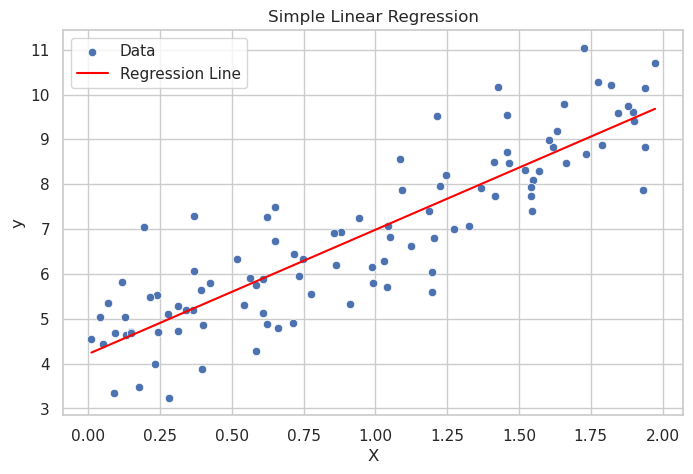

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Set seaborn style
sns.set(style='whitegrid')

# ----------------------------
# 1. Generate Sample Data
# ----------------------------
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Convert to pandas for convenience
df = pd.DataFrame({'X': X.flatten(), 'y': y.flatten()})

# ----------------------------
# 2. Fit Linear Regression
# ----------------------------
model = LinearRegression()
model.fit(df[['X']], df['y'])

# Predictions
df['y_pred'] = model.predict(df[['X']])
df['residuals'] = df['y'] - df['y_pred']

# ----------------------------
# 3. Plot: Data and Regression Line
# ----------------------------
plt.figure(figsize=(8, 5))
sns.scatterplot(x='X', y='y', data=df, label='Data')
sns.lineplot(x='X', y='y_pred', data=df, color='red', label='Regression Line')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()


# Validation du modèle

Nous souhaitons à évaluer dans quelle mesure le modèle s'ajuste bien aux données et s'il est capable de généraliser à de nouvelles données.


## Analyse des coefficients (significativité statistique)

- Utiliser un $t$-test pour chaque coefficient $\hat{\beta}_j$:
  - Hypothèse nulle: $\beta_j=0$ (pas d'effet de la variable $x_j$)
  - Regarder la p-value associé au test: si $p<0.05$ le coefficient est statistiquement significatif (au seuil de $5\%$.)

## Qualité de l'ajustement (ou _goodness-of-fit_)

Nous pouvons calculer le coefficient $R^2$ de détermination. Celui-ci donne la proportion de la variance de $y$ expliqué par la modèle.

$$ R^2 = 1 - \dfrac{SSE}{SST} $$

- SSE: Erreur de la somme des carrés
- SST: Somme totale des carrés

Ainsi plus le coefficient $R^2$ est proche de $0$ plus l'ajustement est bon.

Nous pouvons également calculer le coefficient $R^2_\text{ajusté}$ qui par rapport au coefficient précédent pénalise les variables inutiles, et de cette manière tente à éviter le surréajustement (ou _overfitting_)

## Validation par les résidus (ou _diagnostics_)

Nous étudions ici le comportement des résidus: $\varepsilon = y_i - \hat{y}_i.

Cette étude consiste à vérifier les hypotèses du modèle:
- Homoscédasticité: les résidus doivent avoir une variance constante (pas d'effet d'éventail.)
- Indépendance des résidus: surtout sur les données temporelles.
- Normalité des résidus: via test de Shapiro-Wilk ou QQ-plot.
- Pas de tendance des résidus: ils doivent être centrés autour de $0$, et aléatoirement dispersés.

Intercept: 4.22
Coefficient: 2.77
R² Score: 0.769
RMSE: 0.898


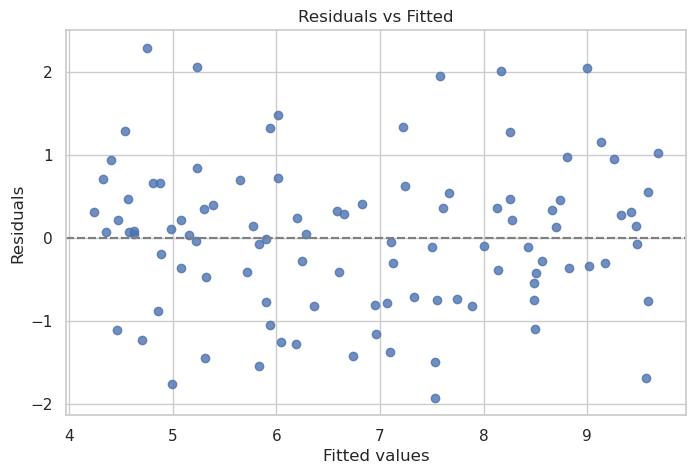

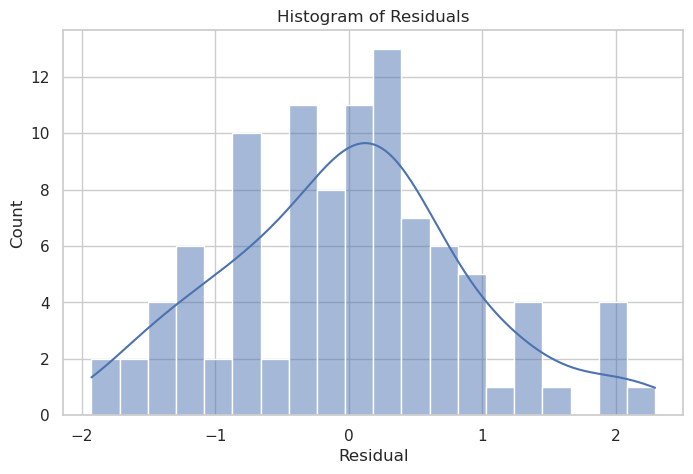

In [9]:
# ----------------------------
# 4. Print Summary
# ----------------------------
print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficient: {model.coef_[0]:.2f}")
print(f"R² Score: {r2_score(df['y'], df['y_pred']):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(df['y'], df['y_pred'])):.3f}")


# ----------------------------
# 5. Plot: Residuals vs Fitted
# ----------------------------
plt.figure(figsize=(8, 5))
sns.residplot(x='y_pred', y='y', data=df, lowess=False,
              line_kws={'color': 'red', 'lw': 1})
plt.axhline(0, color='gray', linestyle='--')
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

# ----------------------------
# 6. Histogram of Residuals
# ----------------------------
plt.figure(figsize=(8, 5))
sns.histplot(df['residuals'], kde=True, bins=20)
plt.title('Histogram of Residuals')
plt.xlabel('Residual')
plt.show()
